In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
#clone github repository of lab
! git clone https://github.com/baccuslab/torch-deep-retina.git

Cloning into 'torch-deep-retina'...
remote: Enumerating objects: 5374, done.
remote: Counting objects: 100% (1412/1412), done.
remote: Compressing objects: 100% (496/496), done.
remote: Total 5374 (delta 953), reused 1366 (delta 914), pack-reused 3962
Receiving objects: 100% (5374/5374), 791.37 MiB | 33.08 MiB/s, done.
Resolving deltas: 100% (3435/3435), done.


In [ ]:
#navigate into the right directory
%cd torch-deep-retina

/content/torch-deep-retina


In [ ]:
#make sure all the requiresments are installed
! pip install -r requirements.txt
! pip install -e .
! pip install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for descent: filename=descent-0.2.5-py3-none-any.whl size=11992 sha256=a2ddcf5e78f4a753a8509854245ea7c3998bf18d184e269d44e4fc0ce2c06ec6
  Stored in directory: /root/.cache/pip/wheels/70/7c/ba/299665b78692cd8db7341a72481173078386ca7f7d1b04dd6d
  Created wheel for pyret: filename=pyret-0.6.0-py3-none-any.whl size=24462 sha256=c07e13ad21a3613455df58f07f65614c6b2b3376fc90528adb55a2aff5553130
  Stored in directory: /root/.cache/pip/wheels/7a/0d/51/87b3520d363b37dc5ca3bc5f7f1c4e527aa226650f76fd3bf8
Successfully built descent pyret
Obtaining file:///content/torch-deep-retina
  Preparing metadata (setup.py) ... done
  Running setup.py develop for torchdeepretina
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00


In [ ]:
#navigate to training_scripts folder and download data
%cd training_scripts
! wget https://stacks.stanford.edu/file/druid:rk663dm5577/neural_code_data.zip
! unzip neural_code_data.zip

/content/torch-deep-retina/training_scripts
--2023-10-24 08:27:25--  https://stacks.stanford.edu/file/druid:rk663dm5577/neural_code_data.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1199515850 (1.1G) [application/zip]
Saving to: ‘neural_code_data.zip’

neural_code_data.zi  14%[=>                  ] 168.95M  1.26MB/s    eta 15m 45s

In [ ]:
%cd ..

/content/torch-deep-retina


In [ ]:
from captum.attr import Saliency
import torchdeepretina.io as tdrio
import torchdeepretina.training as training_scripts
from torchdeepretina.utils import load_json
import tables
import matplotlib.pyplot as plt


f2_response is unavailable until you run:
$ pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack


In [ ]:
#move data to the right place, make sure you're in the training_scripts working directory
%cd training_scripts
%cd neural_code_data
!mv ganglion_cell_data/* ./
%cd ..


/content/torch-deep-retina/training_scripts
/content/torch-deep-retina/training_scripts/neural_code_data
/content/torch-deep-retina/training_scripts


In [ ]:
%cd 15-10-07

/content/torch-deep-retina/training_scripts/neural_code_data
/content/torch-deep-retina/training_scripts/neural_code_data/15-10-07


In [ ]:
%cd ..

/content/torch-deep-retina


In [ ]:
#need to be in torch-deep-retina for this
model_file = '/content/torch-deep-retina/training_scripts/skip_wn_0_lr0.005'

model = tdrio.load_model(model_file)


In [ ]:
model.eval()


VaryModel(
  n_units=5, noise=0.05, bias=True, gc_bias=False, chans=[8, 8], bn_moment=0.01, softplus=True, inference_exp=False, img_shape=(40, 50, 50), ksizes=[15, 11, 11]
  (sequential): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False, padding=0
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Dropout(p=0.05, inplace=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Dropout(p=0.05, inplace=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Dropout(p=0.05, inplace=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (7): Dropout(p=0.05, inplace=False)
        (8): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (9): Dropout(p=0.05, inplace=False)
        (10): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (11): Dropout(p=0.05, inplace=F

In [ ]:
params_file = 'training_scripts/hyperparams.json'
hyps = load_json(params_file)
test_data, train_data = training_scripts.get_data(hyps)


In [ ]:
import torch
#print("Stimulus (X):", test_data.X)
#print("Labels (y):", test_data.y)

test_data = test_data.X
test_data = torch.from_numpy(test_data)
print(test_data.shape)

torch.Size([359762, 40, 50, 50])


In [ ]:
example_image = test_data[:1]

with torch.no_grad():
  output = model(example_image)

spike_pred = output
print(spike_pred)

tensor([[0.3600, 7.1406, 0.4404, 3.3486, 0.0129]])


In [ ]:
test_sample = test_data[:40]
print(test_sample.shape)

torch.Size([40, 40, 50, 50])


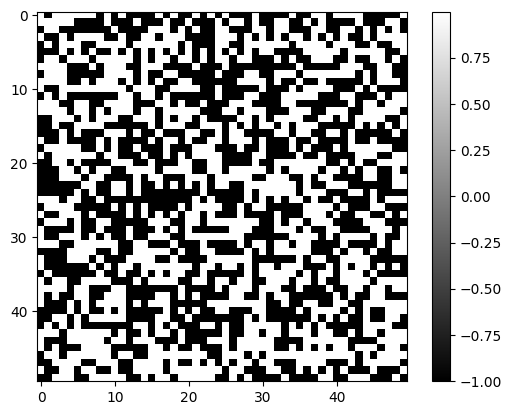

In [ ]:
test_image = test_sample[0]
test_image = test_image.numpy()
plt.imshow(test_image[0], cmap='gray')  # Displaying the first "slice" of the 3D data
plt.colorbar()  # Add a colorbar for reference
plt.show()


In [ ]:
saliency = Saliency(model)
saliency_map = saliency.attribute(test_sample, target = 2)
print(saliency_map.shape)

torch.Size([40, 40, 50, 50])


torch.Size([40, 50, 50])


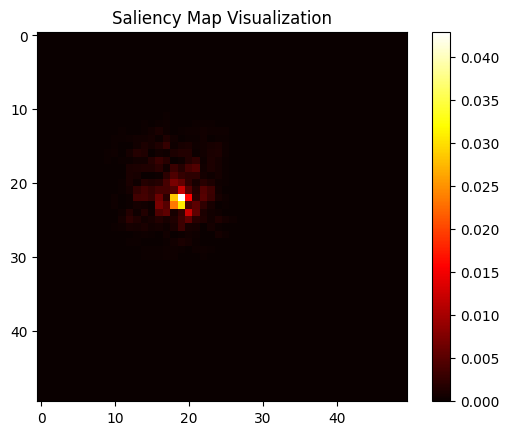

In [ ]:
# Visualize the saliency map

saliency_map_to_visualize = saliency_map[0]  # Extracting the first saliency map (index 0)
print(saliency_map_to_visualize.shape)
# Assuming your saliency map is a PyTorch tensor, convert it to a NumPy array
saliency_map_numpy = saliency_map_to_visualize.detach().cpu().numpy()

# Visualize the saliency map as a heatmap
plt.imshow(saliency_map_numpy[0], cmap='hot', interpolation='nearest')
plt.title('Saliency Map Visualization')
plt.colorbar()  # Add a colorbar to show the scale
plt.show()

In [ ]:
from captum.attr import LayerIntegratedGradients, LayerGradientXActivation

In [ ]:
attribution = LayerIntegratedGradients(model, model.sequential[0].convs[0])

# Compute saliency maps for each layer
test_sample.requires_grad_()
attributions = attribution.attribute(test_sample, target= 2)
attributions_example = attributions[0]
attributions_example = attributions_example.squeeze().cpu().detach().numpy()
print(attributions_example.shape)

(8, 48, 48)


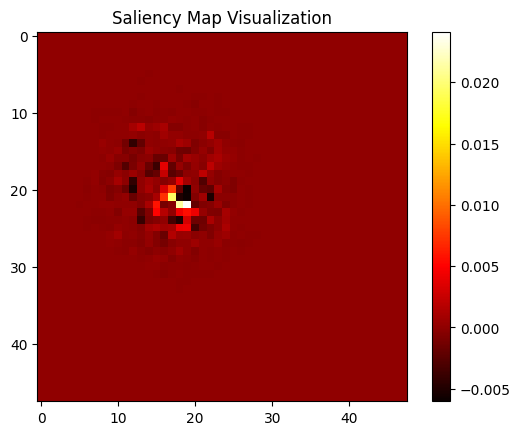

In [ ]:
# Visualize the saliency map for a specific input

plt.imshow(attributions_example[0], cmap='hot')
plt.title('Saliency Map Visualization')
plt.colorbar()  # Add a colorbar to show the scale
plt.show()

In [ ]:
attribution_layer2 = LayerIntegratedGradients(model, model.sequential[4].convs[8])

# Compute saliency maps for each layer
test_sample.requires_grad_()
attributions_layer2 = attribution_layer2.attribute(test_sample, target= 2)
attributions_example_layer2 = attributions_layer2[0]
attributions_example_layer2 = attributions_example_layer2.squeeze().cpu().detach().numpy()
print(attributions_example_layer2.shape)

(8, 26, 26)


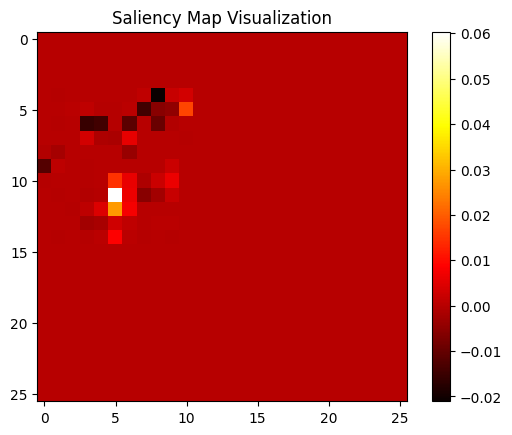

In [ ]:
# Visualize the saliency map for a specific input

plt.imshow(attributions_example_layer2[0], cmap='hot', interpolation='nearest')
plt.title('Saliency Map Visualization')
plt.colorbar()  # Add a colorbar to show the scale
plt.show()

In [ ]:
#before you run the script below you need to go to the hyperparams.json file and change the data path to this:
#"/content/torch-deep-retina/training_scripts/neural_code_data/" and also change exp_name from "test", but it
# can't include a number after an underscore (so not exp_1) and change around any other hyperparameters


In [ ]:
#run this to start training (make sure you're using GPU)
! python3 main.py params=hyperparams.json ranges=hyperranges.json

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [ ]:
#this is for running the analysis, you have to change make_figs and make_rfs to True in the analysis_pipeline.py file
#and change the /test to the name of the experiment you wanna run the analysis for (obvi) <3
! python3 analysis_pipeline.py baseline_wn

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu